# Final Project 4: Ecommerce Product Range Analysis

## Table of Contents
1. Introduction
2. Data Preprocessing
3. Exploratory Data Analysis
4. Statistical Significance Testing
5. Conclusion

**link to PPT: https://drive.google.com/file/d/1XxDiz4pVA7WAbM3f-ns1huYYKXEuukIr/view?usp=sharing**

**link to dashboard: https://public.tableau.com/views/Practicum-finpro/EverythingPlusProductRangeAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link**

## Introduction

### Objective:

Everything Plus, an online store that sells household goods who would like to utilize their data to better understand their product range.<br>
The product manager wants to know which products are the winner and which ones are not selling well.<br>
By knowing this, the manager could plans the better use of marketing as well as operational expenses.

The plan should boost the company's revenue and reduce cost by:
- Optimizing the ads budget to the winning products to boost company's sales.
- Reducing storage and inventory handling expenses by knowing the quantity of stocks the company needs to hold and the reorder point when the company needs to replenish their stocks.
- Also reducing the storage cost by creating a promo or discount for items which don't sell well, so the items can get sold faster.

### Stakeholder:<br>
Project Manager responsible for the product range.

### From this report, the stakeholder can:
- Determine the first and the second range line of products to offer to the customers.
- Optimize the supply chain by knowing the safety stock and reorder point.
- Know the sales trend of the winning products by quantity sold.
- Know the sales trend of the winning products by revenue.

### Data Description:<br>
The dataset contains the transaction history of Everything Plus, an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:
- `InvoiceNo` — order identifier
- `StockCode` — item identifier
- `Description` — item name
- `Quantity` — item quantity 
- `InvoiceDate` — order date
- `UnitPrice` — price per item
- `CustomerID` — unique customer ID

#### Create Presentation
    - The presentation will be delivered as PPT file consisting information about:
        - Project's Background
        - Insight / Recommendation
        - Supporting Analysis
        - Conclusion

## Data Pre-Processing

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from scipy import stats as st

In [3]:
#read the dataset
try:
    df = pd.read_csv('ecommerce_dataset_us/ecommerce_dataset_us.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv')


In [4]:
#top 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [5]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [6]:
#change column names into snake case convention
df.rename(columns = {'InvoiceNo':'invoice_no',
                     'StockCode':'stock_code',
                     'Description':'description', 
                     'Quantity':'quantity',
                     'InvoiceDate':'invoice_date',
                     'UnitPrice':'unit_price',
                     'CustomerID':'customer_id'},
                     inplace = True)
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

In [7]:
#change invoice_date data type to date time
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [8]:
df.describe()

,quantity,unit_price,customer_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Noticed that there are negative values in `quantity` and `unit_price` which doesn't makes sense.

In [9]:
print('This dataset has {} duplicates.'.format(df.duplicated().sum())) #duplicate checking

This dataset has 5268 duplicates.


In [10]:
print('The percentage of missing values:')
for col in df:
        print(col ,':',str(round(df[col].isna().sum()/len(df)*100,2)),'%') #missing value checking

The percentage of missing values:
invoice_no : 0.0 %
stock_code : 0.0 %
description : 0.27 %
quantity : 0.0 %
invoice_date : 0.0 %
unit_price : 0.0 %
customer_id : 24.93 %


**Checking data consistency: `stock_code`**

Try to analyze the pattern from `stock_code` and analyze if there is inconsistent naming in the data.

In [11]:
df['stock_code']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: stock_code, Length: 541909, dtype: object

In [12]:
stock_code_description = df[['stock_code', 'description']].drop_duplicates() #create a dataframe for each unique stock_code and description 
stock_code_description.sort_values(by='stock_code').tail(50) #analyzing for stock_code pattern

,stock_code,description
1813,90214R,"LETTER ""R"" BLING KEY RING"
2425,90214S,"LETTER ""S"" BLING KEY RING"
36459,90214T,"LETTER ""T"" BLING KEY RING"
527065,90214U,"LETTER ""U"" BLING KEY RING"
2424,90214V,"LETTER ""V"" BLING KEY RING"
51415,90214W,"LETTER ""W"" BLING KEY RING"
6164,90214Y,"LETTER ""Y"" BLING KEY RING"
16777,90214Z,"LETTER ""Z"" BLING KEY RING"
14514,AMAZONFEE,AMAZON FEE
299982,B,Adjust bad debt


Based on finding above, the `stock_code` consists of 5 digit numbers or 5 digits followed by a letter.
Other than that might be a voucher code or free gift for the customers.

**Checking data consistency: `description`**

Make sure there is consistency between `stock_code` and `description`, means for each stock_code must have only one description.

In [13]:
stock_code_description['stock_code'].value_counts().sort_values(ascending=False) #analyze if there is one stock code that has multiple description


20713     9
23084     8
21830     7
85175     7
23131     6
         ..
22913     1
85115B    1
23382     1
23485     1
23843     1
Name: stock_code, Length: 4070, dtype: int64

In [14]:
stock_code_description[stock_code_description['stock_code']=='20713'] #print the description of stock_code 20713

,stock_code,description
522,20713,JUMBO BAG OWLS
136272,20713,NaN
263884,20713,wrongly marked. 23343 in box
380688,20713,wrongly coded-23343
403534,20713,found
414145,20713,Found
415582,20713,wrongly marked 23343
420390,20713,Marked as 23343
422750,20713,wrongly coded 23343


As above we could see for stock_code 20713 has 9 different descriptions.

This means there is inconsistencies in the `stock_code` and `description`.

**Checking outliers**

<AxesSubplot: >

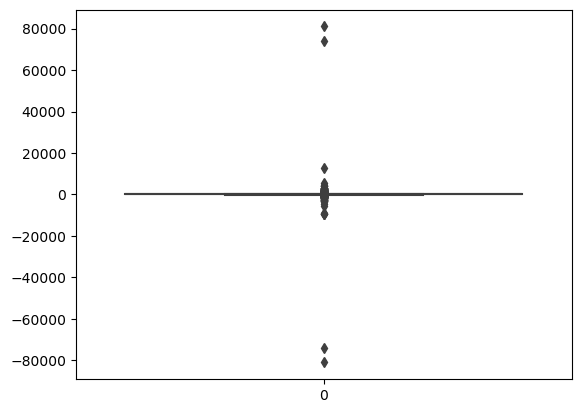

In [15]:
sns.boxplot(df['quantity']) #outlier checking for quantity column

<AxesSubplot: >

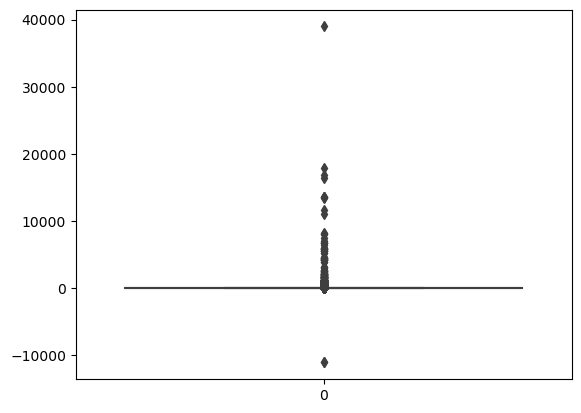

In [16]:
sns.boxplot(df['unit_price']) #outlier checking for unit_price column

#### Data pre-processing Conclusion

Key findings:
- The dataset has 5268 duplicates.
- The percentage of missing values: `description` : 0.27 % and `customer_id` : 24.93 %
- Inconsistent characteristics:
    - there are negative values in `quantity` and `unit_price`.
    - there is inconsistency in the `stock_code` and `description`.
- There are outliers in `quantity` and `unit_price`.

## Data Cleaning

In this section, we'd like to:
- Dropping duplicate values.  
- Handling missing values on `description` and `customer_id`.
- Dropping incorrect values (e.g. minus numbers in `quantity` and `unit_price`).
- Trim rows with inconsistent `stock_code`.
- Create one `desciption` for each `stock_code`.
- Handling outliers.

In [17]:
#drop explicit duplicates
df.drop_duplicates(inplace=True)

For `customer_id` missing values, since we can't make sure if these are legit purchases, we will drop the NA. 

In [18]:
#drop the missing values on customer_id
df.dropna(subset = ['customer_id'], inplace=True)

In [19]:
# drop rows with price and quantity less than or equal to 0
df = df[(df.quantity > 0) & (df.unit_price > 0)]
df.describe()

,quantity,unit_price,customer_id
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
def check_stock_code(stock_code):
    
    """
    Function: verify if the stock code is in right format,
      The function check if the code contains 5-digit numbers or 5-digit numbers with a letter.
    Args:
      input(String): Stock code
    Return:
      Boolean: True or False
    """
    
    a = re.search("^\d{5}$", stock_code)
    b = re.search("^\d{5}[a-zA-Z]{1}$", stock_code)
    if (a or b):
        return True
    else:
        return False

df = df[df['stock_code'].apply(check_stock_code) == True]
df.sort_values(by='stock_code').tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
527067,580691,90214W,"LETTER ""W"" BLING KEY RING",12,2019-12-03 15:48:00,0.29,13790.0
532744,580996,90214Y,"LETTER ""Y"" BLING KEY RING",48,2019-12-04 17:18:00,0.29,14578.0
527068,580691,90214Y,"LETTER ""Y"" BLING KEY RING",12,2019-12-03 15:48:00,0.29,13790.0
193006,553503,90214Y,"LETTER ""Y"" BLING KEY RING",1,2019-05-15 13:20:00,1.25,14606.0
527069,580691,90214Z,"LETTER ""Z"" BLING KEY RING",12,2019-12-03 15:48:00,0.29,13790.0


In [21]:
df_stock = pd.DataFrame(df.groupby('stock_code').apply(lambda x: x['description'].unique())).reset_index() #create a dataframe for each unique stock_code and description 
df_stock.rename(columns = { 0: 'description_mod'}, inplace = True)
df_stock.loc[:, 'description_mod'] = df_stock.description_mod.map(lambda x: x[0]) # Take one description for each stock_code
df_stock

,stock_code,description_mod
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10123C,HEARTS WRAPPING TAPE
4,10124A,SPOTS ON RED BOOKCOVER TAPE
...,...,...
3653,90214U,"LETTER ""U"" BLING KEY RING"
3654,90214V,"LETTER ""V"" BLING KEY RING"
3655,90214W,"LETTER ""W"" BLING KEY RING"
3656,90214Y,"LETTER ""Y"" BLING KEY RING"


In [22]:
#merge df with df_stock
df = pd.merge(df, df_stock, on = 'stock_code')
df = df.drop('description', axis = 1)
df.rename(columns = { 'description_mod': 'description'}, inplace = True)
df['description'] = df['description'].str.strip() #remove excess whitespace
df['description'] = df['description'].str.replace('[#,@,&,.]$', '', regex=True) #remove special character at the end of each row
df.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,description
0,536365,85123A,6,2018-11-29 08:26:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,6,2018-11-29 09:02:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,6,2018-11-29 09:32:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,64,2018-11-29 10:19:00,2.55,17511.0,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,32,2018-11-29 10:39:00,2.55,13408.0,WHITE HANGING HEART T-LIGHT HOLDER


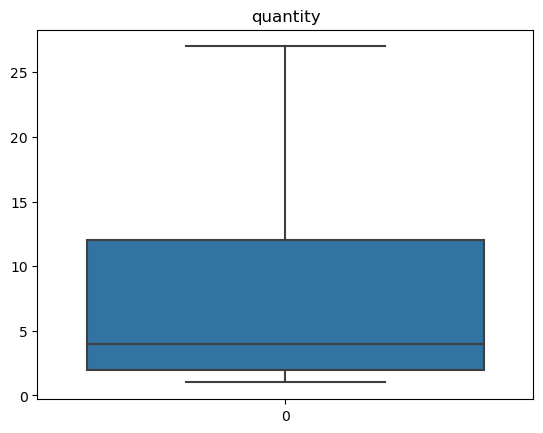

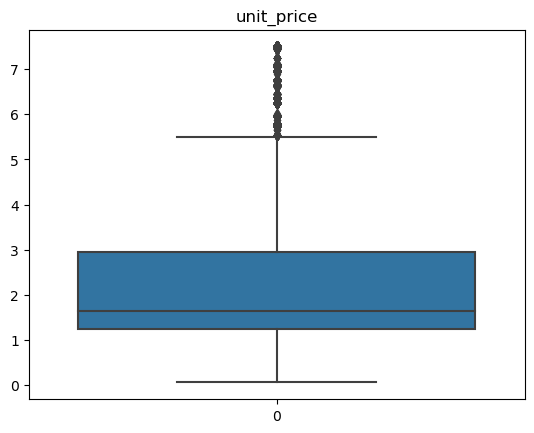

In [23]:
#outlier handling

for i in ['quantity','unit_price']:
    #calculating outlier upper and lower bound for each feature
    q1 = df[i].quantile(.25)
    q3 = df[i].quantile(.75)
    iqr = q3-q1
    outlier_upper_bound = q3 + 1.5*iqr
    outlier_lower_bound = q1 - 1.5*iqr
    
    #dropping the outliers
    df = df.drop(df[df[i]>outlier_upper_bound].index)
    df = df.drop(df[df[i]<outlier_lower_bound].index)
    
    #plotting the features after outlier handling
    plt.figure()
    plt.title(i)
    sns.boxplot(df[i])

In [24]:
# df.to_csv('df_clean.csv', index=False) #export cleaned data frame to csv

## EDA

In this section we'd like to:
- Study the feature's distribution by histogram.
- Indentify the top 10 items in terms of quantity sold.
- Identify the top 10 items in terms of revenue.
- Analyze the sales trend of the top 10 items by quantity sold.
- Analyze the sales trend of the top 10 items by revenue.
- Calculate the safety stock and reorder point of the top items by revenue and quantity sold.

In [25]:
df['sales']=df['quantity']*df['unit_price'] #adding new sales column

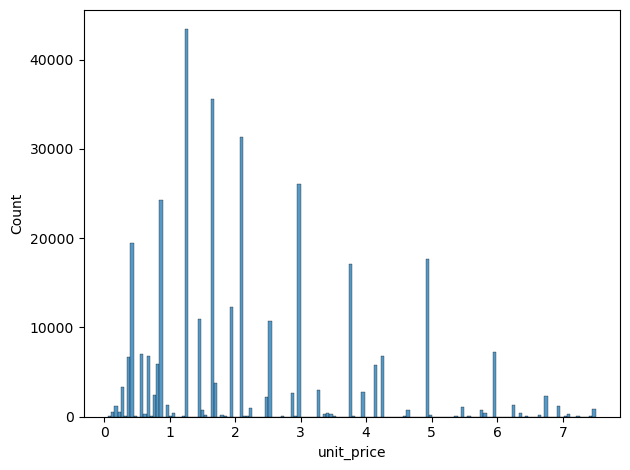

In [26]:
sns.histplot(df['unit_price']); #plotting price histogram

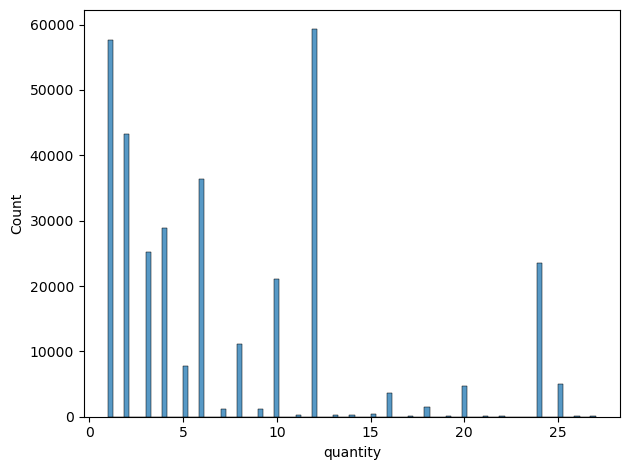

In [27]:
sns.histplot(df['quantity']); #plotting price quantity

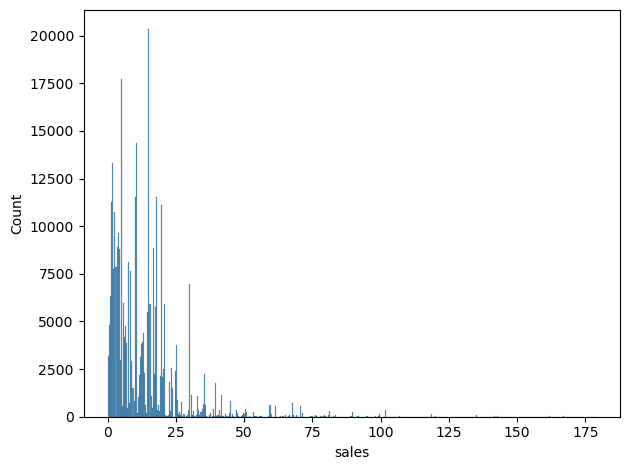

In [28]:
sns.histplot(df['sales']); #plotting sales histogram

Based on histograms above:
- the ecommerce sold low-ticket items mostly around $1-2.
- the quantity purchased also lies on the lower-end (1-12 units per purchase).
- the sales histogram shows the data is right skewed with most of the sales happened below $25.
- these 3 features is not symmetrically distirbuted. this will affect how we approach the type of statistical test we use later in the analysis.

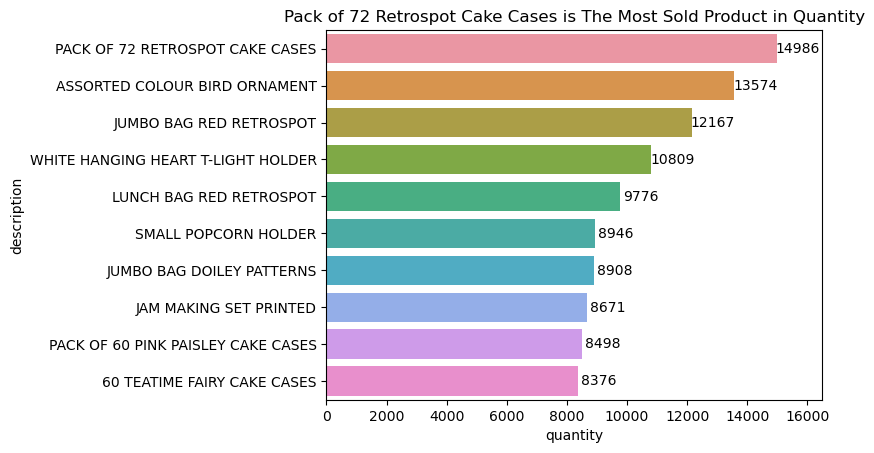

In [32]:
top_q = pd.DataFrame(df.groupby(by='description')['quantity'].sum().sort_values(ascending=False)).reset_index()
top_q['percentage_of_total_q_sold'] = top_q['quantity']/top_q['quantity'].sum()*100
top_q = top_q.head(10)

#plot the barplot
plt.title("Pack of 72 Retrospot Cake Cases is The Most Sold Product in Quantity")
plt.xlim(0,16500) #set the length of x axis
ax = sns.set_palette('crest')
ax = sns.barplot(data=top_q, y='description', x='quantity',
                 )

# Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(),
                    bar.get_y() + bar.get_height() / 2,
                    ), ha='center', va='center',
                   size=10, xytext=(15, 0), rotation=0,
                   textcoords='offset points')


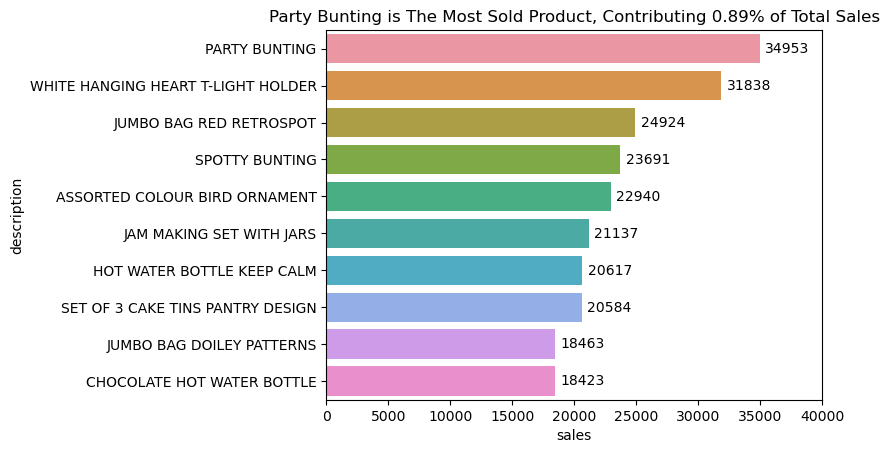

In [33]:
top_sales = pd.DataFrame(df.groupby(by='description')['sales'].sum().sort_values(ascending=False)).reset_index()
top_sales['percentage_of_total_sales'] = top_sales['sales']/top_sales['sales'].sum()*100
top_sales = top_sales.head(10) 

#plot the barplot
plt.title("Party Bunting is The Most Sold Product, Contributing 0.89% of Total Sales")
plt.xlim(0,40000) #set the length of x axis
ax = sns.set_palette('crest')
ax = sns.barplot(data=top_sales, y='description', x='sales',
                 )

# Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(),
                    bar.get_y() + bar.get_height() / 2,
                    ), ha='center', va='center',
                   size=10, xytext=(20, 0), rotation=0,
                   textcoords='offset points')
    

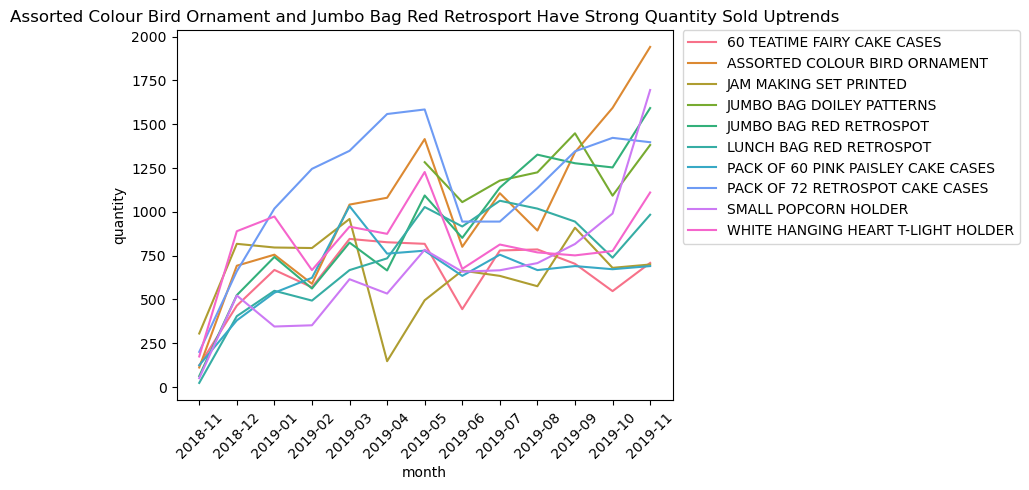

In [34]:
df['month'] = df['invoice_date'].dt.to_period('M') #add month column.
pivot = df[df['description'].isin(top_q['description'])] #filter the dataset to only show data from top 10 items by quantity sold.
pivot = pivot[pivot['month']!='2019-12'] #filter the dataset to show data up to 2019-11, since data for December is not complete yet.
pivot = pivot.groupby(by=['description','month'])['quantity'].sum().reset_index()

#plot the line chart
sns.lineplot(x=pivot['month'].astype(str), y=pivot['quantity'], hue=pivot['description'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Assorted Colour Bird Ornament and Jumbo Bag Red Retrosport Have Strong Quantity Sold Uptrends')
plt.xticks(rotation = 45);

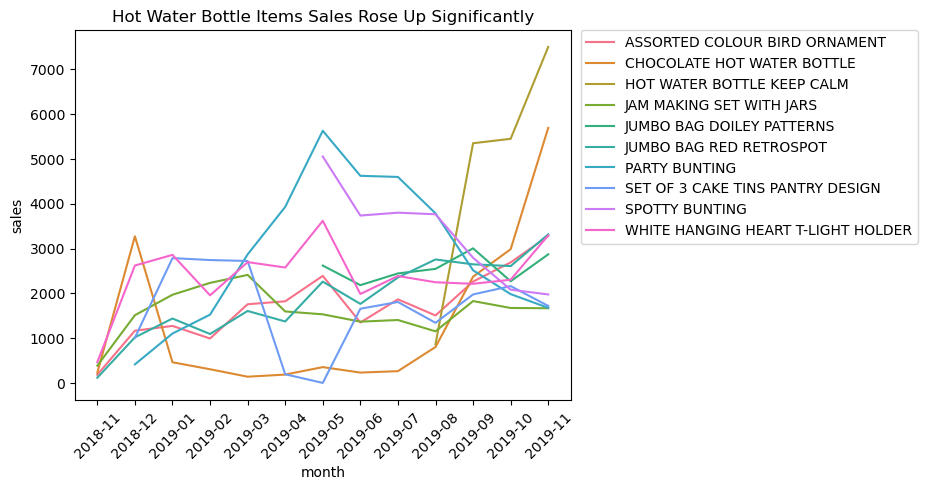

In [35]:
pivot = df[df['description'].isin(top_sales['description'])] #filter the dataset to only show data from top 10 items by revenue.
pivot = pivot[pivot['month']!='2019-12'] #filter the dataset to show data up to 2019-11, since data for December is not complete yet.
pivot = pivot.groupby(by=['description','month'])['sales'].sum().reset_index()

#plot the line chart
sns.lineplot(x=pivot['month'].astype(str), y=pivot['sales'], hue=pivot['description'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Hot Water Bottle Items Sales Rose Up Significantly')
plt.xticks(rotation = 45);

In [36]:
#combining top items by quantity sold and revenue
top_items = pd.concat([top_q['description'],top_sales['description']]).drop_duplicates().reset_index(drop=True)
top_items

0        PACK OF 72 RETROSPOT CAKE CASES
1          ASSORTED COLOUR BIRD ORNAMENT
2                JUMBO BAG RED RETROSPOT
3     WHITE HANGING HEART T-LIGHT HOLDER
4                LUNCH BAG RED RETROSPOT
5                   SMALL POPCORN HOLDER
6              JUMBO BAG DOILEY PATTERNS
7                 JAM MAKING SET PRINTED
8     PACK OF 60 PINK PAISLEY CAKE CASES
9            60 TEATIME FAIRY CAKE CASES
10                         PARTY BUNTING
11                        SPOTTY BUNTING
12              JAM MAKING SET WITH JARS
13            HOT WATER BOTTLE KEEP CALM
14      SET OF 3 CAKE TINS PANTRY DESIGN
15            CHOCOLATE HOT WATER BOTTLE
Name: description, dtype: object

In [37]:
df['date'] = df['invoice_date'].dt.to_period('D') #add date column.
df_daily = df[df['description'].isin(top_items)] #filter the dataset to include only top items
daily_data = df_daily.groupby(by=['description','date']).aggregate({'quantity': 'sum', 'sales': 'sum'}).reset_index() #group the data by item name and date
daily_data

,description,date,quantity,sales
0,60 TEATIME FAIRY CAKE CASES,2018-11-29,75,41.25
1,60 TEATIME FAIRY CAKE CASES,2018-11-30,48,26.40
2,60 TEATIME FAIRY CAKE CASES,2018-12-01,25,13.75
3,60 TEATIME FAIRY CAKE CASES,2018-12-03,8,4.40
4,60 TEATIME FAIRY CAKE CASES,2018-12-04,6,3.30
...,...,...,...,...
3941,WHITE HANGING HEART T-LIGHT HOLDER,2019-12-03,39,117.89
3942,WHITE HANGING HEART T-LIGHT HOLDER,2019-12-04,39,115.05
3943,WHITE HANGING HEART T-LIGHT HOLDER,2019-12-05,72,212.40
3944,WHITE HANGING HEART T-LIGHT HOLDER,2019-12-06,39,115.05


In [38]:
#create an average daily unit sales
avg_daily_q = daily_data.groupby(by=['description'])['quantity'].mean().reset_index()
avg_daily_q.rename(columns = {'quantity':'avg_quantity'}, inplace=True)

#create an max daily unit sales
max_daily_q = daily_data.groupby(by=['description'])['quantity'].max().reset_index()
max_daily_q.rename(columns = {'quantity':'max_quantity'}, inplace=True)

#merge two previous data
daily_q_sales = pd.merge(avg_daily_q, max_daily_q, on='description')

daily_q_sales

,description,avg_quantity,max_quantity
0,60 TEATIME FAIRY CAKE CASES,34.187755,152
1,ASSORTED COLOUR BIRD ORNAMENT,45.703704,152
2,CHOCOLATE HOT WATER BOTTLE,21.291892,107
3,HOT WATER BOTTLE KEEP CALM,47.074468,144
4,JAM MAKING SET PRINTED,32.720755,164
5,JAM MAKING SET WITH JARS,18.698925,86
6,JUMBO BAG DOILEY PATTERNS,48.945055,183
7,JUMBO BAG RED RETROSPOT,41.955172,140
8,LUNCH BAG RED RETROSPOT,33.479452,112
9,PACK OF 60 PINK PAISLEY CAKE CASES,33.325490,123


Safety stock and reorder point calculation of the top items by revenue and quantity sold.

Safety stock formula =
`(max daily unit sales * max lead time in days) - (avg daily unit sales * avg lead time in days)`

`Reorder point formula =
`avg daily unit sales * avg lead time in days + safety stock`

For lead time, the average shipping time for domestic product 3-5 days. For international product 8-10 days, and for product fulfilment from manufacturer 1-2 days.
If we average those figures above, the lead time is ~8 days.
For maximum lead time is ~11 days.

Note:
- The source for internation product lead time is based on the average freight time from China to US.
 <a href="https://www.freightos.com/shipping-routes/shipping-from-china-to-the-united-states/#:~:text=Standard%20air%20freight%20between%20China,standard%20air%20freight%20transit%20times.">*source </a>
 - Source for US domestic shipping time <a href="https://www.shipbob.com/blog/domestic-shipping/#:~:text=Typically%2C%20domestic%20shipping%20services%20in,shipments%20at%20an%20affordable%20rate.">*source </a>


In [41]:
#defining lead time
avg_lead_time = 8
max_lead_time = 12

daily_q_sales['safety_stock']= (daily_q_sales['max_quantity'] * max_lead_time) - (daily_q_sales['avg_quantity'] * avg_lead_time) #claclulate hte safety stock
daily_q_sales['reorder_point']= daily_q_sales['avg_quantity'] * avg_lead_time + daily_q_sales['safety_stock'] #calculate the reorder point

daily_q_sales

,description,avg_quantity,max_quantity,safety_stock,reorder_point
0,60 TEATIME FAIRY CAKE CASES,34.187755,152,1550.497959,1824.0
1,ASSORTED COLOUR BIRD ORNAMENT,45.703704,152,1458.370370,1824.0
2,CHOCOLATE HOT WATER BOTTLE,21.291892,107,1113.664865,1284.0
3,HOT WATER BOTTLE KEEP CALM,47.074468,144,1351.404255,1728.0
4,JAM MAKING SET PRINTED,32.720755,164,1706.233962,1968.0
5,JAM MAKING SET WITH JARS,18.698925,86,882.408602,1032.0
6,JUMBO BAG DOILEY PATTERNS,48.945055,183,1804.439560,2196.0
7,JUMBO BAG RED RETROSPOT,41.955172,140,1344.358621,1680.0
8,LUNCH BAG RED RETROSPOT,33.479452,112,1076.164384,1344.0
9,PACK OF 60 PINK PAISLEY CAKE CASES,33.325490,123,1209.396078,1476.0


#### EDA Findings
- The products which in top 10 by quantity sold are dominated in party decor, lunch bag, and jumbo bag category.
- There are some overlaps in the top products by quantity sold and sales. For top 10 product by sales, hot bottle category is included in this rank.the top items.
- For quantity sold trend, we identified that Assorted Colour Bird Ornament and Jumbo Bag Retrospot rose significantly, while Party Bunting showed strong downtrend and the Set of 3 Cake Tins Pantry Design is the worst performer in the top 10 items throughout the analysis period.
- In the revenue trend, there is emerging category which has risen significantly from August. it is the hot bottle categry, i.e. Hot Water Bottle Keep Calm and Chocolate Hot Water Bottle. In line with the quantity sold trend, Party Bunting also has dipped from the biggest revenue contributor in May to the 9th in the top 10 in November.
- We'd calculated the reorder point for each top items. The number means if the inventory level is below the indicated number, company is suggested to replenish the stock.

### Statistical Testing
- Hypothesis 1: Test if there is a difference in quantity sold between the top 10 items and the others.
    - H0: There is no significance difference in medians of quantity sold between top 10 items and the others.
    - H1: There is a significance difference in medians of quantity sold between top 10 items and the others.
- Hypothesis 2: Test if there is a difference in revenue between the top 10 items and the others.
    - H0: There is no significance difference in medians of revenue between top 10 items and the others.
    - H1: There is a significance difference in medians of revenue between top 10 items and the others.
- From the hypotheses above, we will separate the dataset into 2 groups: top 10 items and others.
- Testing method: Since the distribution of data from histograms we've analyzed is not symmetrical , we will test the difference in medians using `Mann-Whitney U Test`.
- Alpha = 0.05 as it is the most used for behavioral statistical testing.
- Result interpretation:
    - p-value <= alpha means we reject the H0 (there is significant difference)
    - p-value > alpha means we could not reject the H0 (there is no significant difference)

In [40]:
#splitting between top items and other itmes
df_top_items = df[df['description'].isin(top_items)]
df_other_items = df[df['description'].isin(top_items)==False]

In [43]:
stats.mannwhitneyu(df_top_items['sales'], df_other_items['sales'])

MannwhitneyuResult(statistic=3177516296.5, pvalue=0.0)

In [44]:
alpha = 0.05

#hypothesis 1 testing
results_1 = stats.mannwhitneyu(df_top_items['quantity'], df_other_items['quantity'])[1]
print('p-value: '+ str(results_1))
if results_1 <= alpha:
    print("We reject the null hyphotesis.")
    print('There is a significant difference in the medians of quantity sold between top items and other items.')
else:
    print("We could not reject the null hypothesis.")
    print('There is no difference in the medians of quantity sold between top items and other items.')


p-value: 6.883749539679032e-85
We reject the null hyphotesis.
There is a significant difference in the medians of quantity sold between top items and other items.


In [45]:
#hypothesis 2 testing
results_2 = stats.mannwhitneyu(df_top_items['sales'], df_other_items['sales'])[1]
print('p-value: '+ str(results_2))
if results_2 <= alpha:
    print("We reject the null hyphotesis.")
    print('There is a significant difference in the medians of sales between top items and other items.')
else:
    print("We could not reject the null hypothesis.")
    print('There is no difference in the medians of sales between top items and other items.')

p-value: 0.0
We reject the null hyphotesis.
There is a significant difference in the medians of sales between top items and other items.


### Conclusion
From this analysis, we had find that:
- Everything Plus sold low-ticket items mostly around $1-2.
- The quantity purchased also lies on the lower-end (1-12 units per purchase).
- The sales histogram shows the data is right skewed with most of the sales happened below $25.
- The products which in top 10 by quantity sold are dominated in party decor, lunch bag, and jumbo bag category.
- There are some overlaps in the top products by quantity sold and sales. For top 10 product by sales, hot bottle category is included in the top items.
- For quantity sold trend, we identified that Assorted Colour Bird Ornament and Jumbo Bag Retrospot rose significantly, while Party Bunting showed strong downtrend and the Set of 3 Cake Tins Pantry Design is the worst performer in the top 10 items throughout the analysis period.
- In the revenue trend, there is emerging category which has risen significantly from August. it is the hot bottle category, i.e., Hot Water Bottle Keep Calm and Chocolate Hot Water Bottle. In line with the quantity sold trend, Party Bunting also has dipped from the biggest revenue contributor in May to the 9th in the top 10 in November.
- We'd calculated the reorder point for each top items. The number means if the inventory level is below the indicated number, company is suggested to replenish the stock.
- From statistical testing, we found that:
    - There is a difference in the medians of quantity sold between top items and other items.
    - There is a difference in the medians of sales between top items and other items.

#### Recommendation
The product manager could boost the company's revenue and reduce cost by:
- Optimizing the ads budget to the rising category i.e. Hot Bottle items, Bird Ornament, and Jumbo Bag to boost company's sales.
- Allocating the marketing budget from low selling products to the top items.
- Reducing storage and inventory handling expenses by knowing the quantity of stocks the company needs to hold and the reorder point we've calculated when the company needs to replenish their stocks.
- Also reducing the storage cost by creating a promo or discount for items which don't sell well, so the items can get sold faster.


#### Further Improvements
For further analysis, analyst could:
- Analyze the frequently bought together items using apriori algorithm to create a recommender system based on products in the user's cart to increase sales.
- In this analysis, we only focus on the top performing items. In the future, we also could analyze the worst performers, so manager can decide whether to restock the items or not.
- Reorder point calculation is based on the lead time assumption using shipping industry standard. Further data about the average lead time specifically for the company might increase the accuracy of the calculation.
- Further data about storage capacity, shipping and storage costs also helps to minimize the cost by using quantitative operation optimization method.
